<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-исследования:" data-toc-modified-id="Цель-исследования:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель исследования:</a></span></li><li><span><a href="#Задачи-исследования:" data-toc-modified-id="Задачи-исследования:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи исследования:</a></span></li><li><span><a href="#1.-Предобработка-данных" data-toc-modified-id="1.-Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1. <a name="1" rel="nofollow">Предобработка данных</a></a></span></li><li><span><a href="#2.-Исследовательский-анализ-данных" data-toc-modified-id="2.-Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2. <a name="2" rel="nofollow">Исследовательский анализ данных</a></a></span></li><li><span><a href="#3.-Проверка-гипотезы" data-toc-modified-id="3.-Проверка-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>3. <a name="3" rel="nofollow">Проверка гипотезы</a></a></span></li><li><span><a href="#4.-Выводы" data-toc-modified-id="4.-Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>4. <a name="4" rel="nofollow">Выводы</a></a></span></li></ul></div>

### Цель исследования:

- Определить закономерность заказа пиццы в зависимости от дня недели и времени заказа (утро, день, вечер)
- Определить вкусовые предпочтения покупателей
- Рассмотреть возможность формирования спецпредложений на основе предпочтений покупателей, в том числе:
    * выявить лидирующие позиции, позиции аутсайлеры и новые "звезды" (вкусы с растущим оборотом в натуральном выражении)
    * рассмотреть возможность проведения промоакций для пиццы малого размера (увеличение оборота за счет дешевого продукта + знакомство покупателей с   новыми вкусами)

### Задачи исследования:
Этапы:
1.  <a href=#2>Предобработку данных</a>
2.  <a href=#3>Исследовательский анализ данных</a>
3.  <a href=#4>Проверку гипотез</a>
5.  <a href=#5>Выводы</a>

### 1. <a name="1">Предобработка данных</a>
Основные задачи этапа:
1. Импортировать библиотеки;
2. Загрузить данные;
3. Провести замену названий столбцов;
4. Преобразовать данные в соответствующие типы;
5. Обработать пропуски (при необходимости);

Исходный массив содержит следующие данные (12 столбцов):
- order_id: идентификатор заказа
- order_details_id: идентификатор заказанной пиццы (порядковый номер приготовления/пробития по кассе)
- pizza_id: ключ-связка наименование пиццы-размер
- quantity: количество пиццы в привязке к pizza-id
- order_date: дата размещения заказа
- order_time: время размещения заказа
- unit_price: цена за единицу товара, $
- total_price: стоимость покупки (цена * количество), $
- pizza_size: размер пиццы (Маленький S, Средний M, Большой L, Большой экстра XL или Гигантской XXL)
- pizza_category: группировка пиццы в классы в зависимости от состава (классическая Classic, вегетарианская Veggie, курица Chicken, авторская пицца Supreme)
- pizza_ingredients: ингредиенты, используемые в пицце, как показано в меню (все они включают сыр Моцарелла, даже если не указано; и все они включают томатный соус, если не указан другой соус)
- pizza_name: название пиццы

In [42]:
## Импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [43]:
## Загрузка данных
df = pd.read_excel(r'Data Model - Pizza Sales.xlsx')

In [44]:
## Названия столбцов
df.head (5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [45]:
## Формат массива
df.shape

(48620, 12)

In [46]:
## Информация по массиву
df.info

<bound method DataFrame.info of        order_details_id  order_id       pizza_id  quantity order_date  \
0                     1         1     hawaiian_m         1 2015-01-01   
1                     2         2  classic_dlx_m         1 2015-01-01   
2                     3         2  five_cheese_l         1 2015-01-01   
3                     4         2    ital_supr_l         1 2015-01-01   
4                     5         2     mexicana_m         1 2015-01-01   
...                 ...       ...            ...       ...        ...   
48615             48616     21348  ckn_alfredo_m         1 2015-12-31   
48616             48617     21348  four_cheese_l         1 2015-12-31   
48617             48618     21348   napolitana_s         1 2015-12-31   
48618             48619     21349     mexicana_l         1 2015-12-31   
48619             48620     21350      bbq_ckn_s         1 2015-12-31   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36    

In [47]:
## Подсчет пустых значений
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [48]:
## Тип данных
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [49]:
##Добавление столбцов месяц покупки, день недели
df['Day_of_week']= df['order_date'].dt.day_name()
df['Day_of_week_no']= df['order_date'].dt.day_of_week
df['Month']= df['order_date'].dt.month_name()
df['Month_no']= df['order_date'].dt.month
df['order_time']=df['order_time'].astype(str)
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)



In [50]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
Day_of_week                  object
Day_of_week_no                int64
Month                        object
Month_no                      int64
Hour                         object
Minute                       object
Second                       object
dtype: object

In [51]:
## Изменение типа данных для Hour
df1 = df.copy()
df1['Hour'] = df1['Hour'].astype("int64")

df1.head()
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  Day_of_week        48620 non-null  object        
 13  Day_of_week_no     48620 non-null  int64         
 14  Month 

In [52]:
## Присвоение переменной значений времени суток по столбцу 'Hour'

Day_time = []
for row in df1['Hour']:
        if row < 12 :    Day_time.append('Morning')
        elif row < 18:   Day_time.append('Afternoon')
        elif row < 24:  Day_time.append('Evening')
        else:           Day_time.append('Not_Rated')
df1['Day_time'] = Day_time


In [53]:
df1.head(5)


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Day_of_week,Day_of_week_no,Month,Month_no,Hour,Minute,Second,Day_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,3,January,1,11,38,36,Morning
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,3,January,1,11,57,40,Morning
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,3,January,1,11,57,40,Morning
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,3,January,1,11,57,40,Morning
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,3,January,1,11,57,40,Morning


In [54]:
df1.nunique ()

order_details_id     48620
order_id             21350
pizza_id                91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
Day_of_week              7
Day_of_week_no           7
Month                   12
Month_no                12
Hour                    15
Minute                  60
Second                  60
Day_time                 3
dtype: int64

### 2. <a name="2">Исследовательский анализ данных</a>
Основные задачи этапа:
1. Описать типовую покупку по параметрам: сумма чека, количество наименований в чеке, время суток и день недели.
2. Определить лидеров, перспективные вкусы, вкусы аутсайдеры (ABC-анализ внутри наименование без учета размера, с учетом размера).
3. Визуализировать ключевые показатели.
4. Выявить закономерности между показателями время суток и день недели, размер покупки и день недели.

In [55]:
## Типовая покупка
print('Количество заказов ' , df1['order_id'].nunique())
print('Среднее количество пицц в заказе ' , round(df1['quantity'].sum()/int((df1['order_id'].nunique())),1))
print('Среднее количество наименований в заказе ' , round(df1['pizza_name'].count()/int((df1['order_id'].nunique())),1))
print('Средняя сумма покупки, $ ' , round(df1['total_price'].sum()/int((df1['order_id'].nunique())),1))

Количество заказов  21350
Среднее количество пицц в заказе  2.3
Среднее количество наименований в заказе  2.3
Средняя сумма покупки, $  38.3


  pizza_category  quantity
1        Classic     14888
2        Supreme     11987
3         Veggie     11649
0        Chicken     11050


C:\Users\im071\AppData\Local\Temp\ipykernel_16900\2860253155.py:9: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



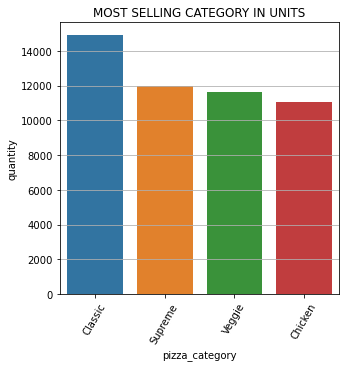

In [56]:
from itertools import groupby
Topcategory_unit=df1.groupby('pizza_category')['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head()
print(Topcategory_unit)
plt.figure(figsize=(5,5))
graph=sns.barplot(x='pizza_category',y='quantity',data=Topcategory_unit)
graph.set_title('MOST SELLING CATEGORY IN UNITS')
plt.xticks(rotation=60)

plt.grid(b=True, axis='y')
plt.show()


## Если не учитывать количество, а только наименование, то
##Topcategory=df1.groupby("pizza_category")["order_id"].agg(["count"]).reset_index().sort_values(by="count",ascending=False).head()

  pizza_category  total_price
1        Classic    220053.10
2        Supreme    208197.00
0        Chicken    195919.50
3         Veggie    193690.45


C:\Users\im071\AppData\Local\Temp\ipykernel_16900\3718161419.py:9: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



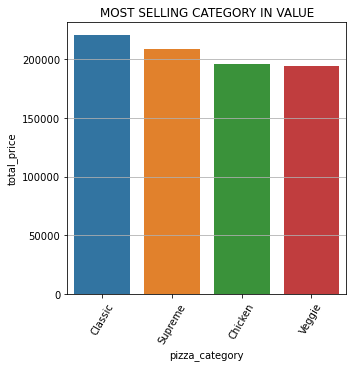

In [57]:
from itertools import groupby
Topcategory_sales=df1.groupby('pizza_category')['total_price'].sum().reset_index().sort_values(by='total_price',ascending=False).head()
print(Topcategory_sales)
plt.figure(figsize=(5,5))
graph=sns.barplot(x='pizza_category',y='total_price',data=Topcategory_sales)
graph.set_title('MOST SELLING CATEGORY IN VALUE')
plt.xticks(rotation=60)

plt.grid(b=True, axis='y')
plt.show()

In [58]:
## Цена за 1 пиццу без учета размера
Price_per_unit=round((df1.groupby('pizza_category')['total_price'].sum()/df1.groupby('pizza_category')['quantity'].sum()),2)
print(Price_per_unit)

pizza_category
Chicken    17.73
Classic    14.78
Supreme    17.37
Veggie     16.63
dtype: float64


In [59]:
## Структура продаж по типу пиццы в натуральном выражении, шт
share1=(df.groupby(['pizza_category'])['quantity'].sum())/df1['quantity'].sum()
share1

## формула для подсчета попаданий категория - заказ позиции без учета количества
## share1=(df.groupby(['pizza_category', 'quantity'])['quantity'].sum())/df1['quantity'].sum()

pizza_category
Chicken    0.222899
Classic    0.300319
Supreme    0.241800
Veggie     0.234982
Name: quantity, dtype: float64

In [60]:
## Структура продаж по размеру пиццы в натуральном выражении, шт
share2=(df.groupby(['pizza_size'])['quantity'].sum())/df1['quantity'].sum()
share2

pizza_size
L      0.382378
M      0.315387
S      0.290535
XL     0.011135
XXL    0.000565
Name: quantity, dtype: float64

In [61]:

## Структура продаж по типу пиццы в натуральном выражении, шт
share3=(df.groupby(['pizza_category', 'pizza_size'])['quantity'].sum())/df1['quantity'].sum()
share3

pizza_category  pizza_size
Chicken         L             0.099488
                M             0.078549
                S             0.044862
Classic         L             0.081837
                M             0.082947
                S             0.123835
                XL            0.011135
                XXL           0.000565
Supreme         L             0.092064
                M             0.081615
                S             0.068120
Veggie          L             0.108989
                M             0.072276
                S             0.053718
Name: quantity, dtype: float64

<AxesSubplot:title={'center':'SALE BY SIZE'}, xlabel='pizza_category'>

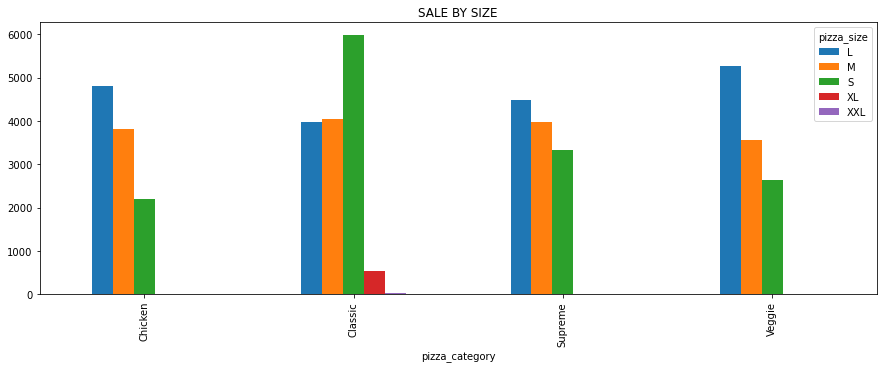

In [62]:
df1.groupby("pizza_category")["pizza_size"].value_counts().unstack().plot(kind="bar",figsize=(15,5), title="SALE BY SIZE")



In [63]:
## Структура продаж по типу пиццы в стоимостном выражении
share4=(df.groupby(['pizza_category'])['total_price'].sum())/df1['total_price'].sum()
share4

pizza_category
Chicken    0.239551
Classic    0.269060
Supreme    0.254563
Veggie     0.236826
Name: total_price, dtype: float64

In [64]:
## Посмотреть распределение %% через crosstab некорректно, так как в оддной строке может быть куплено несколько пицц
## share = pd.crosstab(df['pizza_size'], df['pizza_category'] , normalize = "index")
## share = pd.crosstab(df['pizza_size'], df['pizza_category'] , margins=True)

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

sales_week= df1.groupby(['Day_of_week', 'Day_of_week_no'])['quantity'].sum().reset_index().sort_values(['Day_of_week_no'])
print(sales_week)

fig =px.line(sales_week, x="Day_of_week", y="quantity", title='SALE BY DAY OF WEEK')

fig.show()



  Day_of_week  Day_of_week_no  quantity
1      Monday               0      6485
5     Tuesday               1      6895
6   Wednesday               2      6946
4    Thursday               3      7478
0      Friday               4      8242
2    Saturday               5      7493
3      Sunday               6      6035


In [66]:
df1.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Day_of_week,Day_of_week_no,Month,Month_no,Hour,Minute,Second,Day_time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,3,January,1,11,38,36,Morning
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,3,January,1,11,57,40,Morning
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,3,January,1,11,57,40,Morning
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,3,January,1,11,57,40,Morning
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,3,January,1,11,57,40,Morning


In [67]:
## Создание датафрейма по вкусу пиццы без учета номера заказа c колонками pizza_name, quantity, total_price, Month_no
df4_1=df1[['pizza_name', 'quantity', 'total_price','Month_no']]
df4_2=(df4_1.groupby(['pizza_name','Month_no'])['quantity'].sum()).unstack().reset_index()
df4_2.head(32)

Month_no,pizza_name,1,2,3,4,5,6,7,8,9,10,11,12
0,The Barbecue Chicken Pizza,211,193,231,214,226,194,219,187,192,168,221,176
1,The Big Meat Pizza,150,151,176,139,190,139,185,160,142,151,174,157
2,The Brie Carre Pizza,35,44,46,32,46,40,44,43,49,34,42,35
3,The Calabrese Pizza,67,86,65,83,84,90,83,73,66,81,94,65
4,The California Chicken Pizza,202,204,194,176,199,222,187,231,177,162,209,207
5,The Chicken Alfredo Pizza,86,74,100,74,85,83,73,83,81,80,93,75
6,The Chicken Pesto Pizza,77,82,81,89,79,79,85,81,84,72,82,82
7,The Classic Deluxe Pizza,190,173,204,216,218,197,227,208,209,196,218,197
8,The Five Cheese Pizza,138,113,125,107,124,124,139,113,115,113,109,89
9,The Four Cheese Pizza,159,160,165,162,182,148,162,139,147,169,149,160


По следуюшим позициям отмечается падение продаж к концу периодов усредненно в квартальной разбивке)
- The Barbecue Chicken Pizza
- The Brie Carre Pizza
- The Five Cheese Pizza
- The Green Garden Pizza
- The Italian Vegetables Pizza
- The Pepperoni, Mushroom, and Peppers Pizza
- The Spinach and Feta Pizza
- The Vegetables + Vegetables Pizza

По позициям наоборот рост - можно прелагать как "новинки"
- The Calabrese Pizza
- The Classic Deluxe Pizza
- The Mediterranean Pizza


In [68]:
pizza_count= df4_1.groupby(['pizza_name','Month_no'])['quantity'].sum().reset_index().sort_values(['Month_no'])

fig = px.line(pizza_count, x="Month_no", y="quantity",color="pizza_name",
              line_group="pizza_name")
fig.show()



In [69]:
df4_1.dtypes

pizza_name      object
quantity         int64
total_price    float64
Month_no         int64
dtype: object

                    pizza_name  quantity
7     The Classic Deluxe Pizza      2453
0   The Barbecue Chicken Pizza      2432
12          The Hawaiian Pizza      2422
20         The Pepperoni Pizza      2418
30      The Thai Chicken Pizza      2371


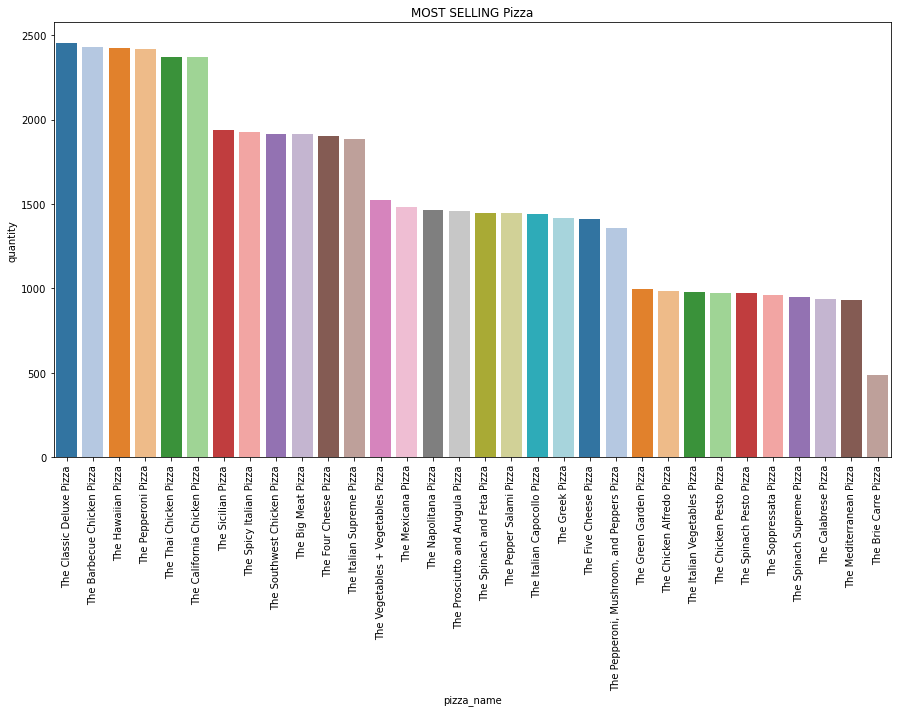

In [70]:
Rate_pizza=df4_1.groupby("pizza_name")['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(100)
print(Rate_pizza.head(5))
plt.figure(figsize=(15,8))
graph=sns.barplot(x='pizza_name',y='quantity',palette="tab20",data=Rate_pizza)
graph.set_title('MOST SELLING Pizza')
plt.xticks(rotation=90)
plt.show()

В идеале мы знаем, что у нас 4 варианта пицц, в одном чеке в среднем 2,3 пиццы.
<br>
Надо построить дерево покупки и тогда мы сможем во время оформления заказа прелагать заказать ополнительну пиццу другого вкуса, размера?
Условно, если я сделал заказ на Classic, то в 37% случаев покупатели заказываюют вместе с ней Veggie. Если я заказал Chicken, то в 45% случаев в заказе присутствует Classic.
<br>
Как прописать данный анализ? Столбцы order_id, pizza_category

### 3. <a name="3">Проверка гипотезы</a>
Основная гипотеза: "Существует зависимость между днем недели и размером покупки".

In [71]:
## Необхоимо получить массив в котором будут колонки order_id, quantity, total_price, Day_of_week, Day_time
## - Сначала делаем новый массив из df1, 
## - затем еще 2 массива с ключом order_id и суммируем в них quantity и total_price, 
## - соединяем все в 1 массив и притягиваем по order_id день недели и время суток
df3=df1[['order_id', 'quantity', 'total_price']]
print (df3.sum(axis=1))
df3.head(5)


0           15.25
1           19.00
2           21.50
3           23.75
4           19.00
           ...   
48615    21365.75
48616    21366.95
48617    21361.00
48618    21370.25
48619    21363.75
Length: 48620, dtype: float64


,order_id,quantity,total_price
0,1,1,13.25
1,2,1,16.00
2,2,1,18.50
3,2,1,20.75
4,2,1,16.00


In [72]:
corr_dt1=df3.groupby(['order_id'])['quantity'].sum().reset_index().sort_values(['order_id'])
corr_dt2=df3.groupby(['order_id'])['total_price'].sum().reset_index().sort_values(['order_id'])
corr_dt=corr_dt1.merge(corr_dt2)
corr_dt.head(2)

,order_id,quantity,total_price
0,1,1,13.25
1,2,5,92.00


In [73]:
extra=df1[['order_id', 'order_date','Month_no', 'Day_of_week_no', 'Hour']]
corr_dt2=corr_dt.merge(extra)
corr_fin=corr_dt2.drop_duplicates()
corr_fin.head(5)

,order_id,quantity,total_price,order_date,Month_no,Day_of_week_no,Hour
0,1,1,13.25,2015-01-01,1,3,11
1,2,5,92.00,2015-01-01,1,3,11
6,3,2,37.25,2015-01-01,1,3,12
8,4,1,16.50,2015-01-01,1,3,12
9,5,1,16.50,2015-01-01,1,3,12


In [74]:
### Корреляция между временем заказа и днем недели
### Исходя из полученных данных - корреляция слабая между днем недели и временем суток, так и между днем недели-количеством
import numpy
numpy.corrcoef(corr_fin['Day_of_week_no'],corr_fin['Hour']),[0, 1]

(array([[1.        , 0.11943463],
        [0.11943463, 1.        ]]),
 [0, 1])

In [75]:
import numpy
numpy.corrcoef(corr_fin['Day_of_week_no'],corr_fin['quantity']),[0, 1]

(array([[1.        , 0.00362953],
        [0.00362953, 1.        ]]),
 [0, 1])

In [76]:
## Распределение внутри датафрейма
numerical = [var for var in corr_fin.columns if df[var].dtype!='O']
corr_fin[numerical].describe()


,order_id,quantity,total_price,Month_no,Day_of_week_no
count,21350.000000,21350.000000,21350.000000,21350.000000,21350.000000
mean,10675.500000,2.321967,38.307262,6.435035,3.017518
std,6163.358459,1.825735,30.648197,3.425549,1.933862
min,1.000000,1.000000,9.750000,1.000000,0.000000
25%,5338.250000,1.000000,17.950000,3.000000,1.000000
50%,10675.500000,2.000000,32.500000,6.000000,3.000000
75%,16012.750000,3.000000,49.500000,9.000000,5.000000
max,21350.000000,28.000000,444.200000,12.000000,6.000000


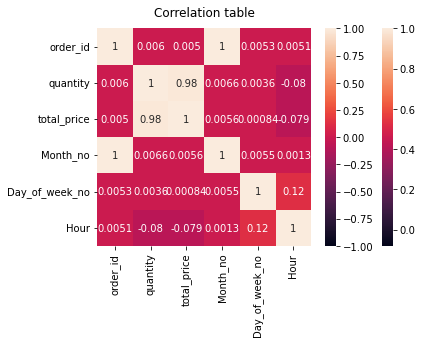

In [77]:
sns.heatmap(corr_fin.corr());
heatmap = sns.heatmap(corr_fin.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation table', fontdict={'fontsize':12}, pad=12);

### 4. <a name="4">Выводы</a>
Типовая покупка имеет следующие характеристики:
- Среднее количество пицц в заказе  2.3
- Среднее количество наименований в заказе  2.3
- Среднее сумма покупки, $  38.3
- Наиболее популярная линейка - Classic, на долю продаж которой приходится 30% продаж в натуральном выражении и 27% продаж в стоимостном выражении. А самый популярный размер для линейки Classic - S (12% продаж в натуральном выражении, шт)
- Наиболее популярные размеры пиццы - L и М без учета типа пиццы.
- TOP-5 пицц - The Classic Deluxe Pizza, The Barbecue Chicken Pizza, The Hawaiian Pizza, The Pepperoni Pizza, The Thai Chicken Pizza
- Основные продажи приходятся на выходные. Но при этом нет корреляции/зависимости между нем недели и размером покупки.

По следующим позициям отмечается падение продаж к концу периодов (усредненно в квартальной разбивке)
- The Barbecue Chicken Pizza
- The Brie Carre Pizza
- The Five Cheese Pizza
- The Green Garden Pizza
- The Italian Vegetables Pizza
- The Pepperoni, Mushroom, and Peppers Pizza
- The Spinach and Feta Pizza
- The Vegetables + Vegetables Pizza

По указанным ниже позициям наоборот отмечается рост - можно предлагать как "новинки", что привеет к росту чека и оборота
- The Calabrese Pizza
- The Classic Deluxe Pizza
- The Mediterranean Pizza